In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

In [2]:
df = pd.read_excel('teste_5.xlsx')

In [6]:
pd.set_option('display.max_rows', 100)
df.head(100)

,Y,X1,X2,X3,X4
0,1,A,300,1.414214,T
1,2,A,299,1.515717,S
2,2,A,299,1.624505,T
3,2,A,299,1.741101,S
4,5,A,298,1.866066,T
5,6,A,297,2.000000,S
6,6,A,297,2.143547,T
7,7,A,295,2.297397,S
8,7,A,295,2.462289,T
9,11,A,294,2.639016,S


In [22]:
df.head()

,Y,X1,X2,X3,X4
0,1,A,300,1.414214,T
1,2,A,299,1.515717,S
2,2,A,299,1.624505,T
3,2,A,299,1.741101,S
4,5,A,298,1.866066,T


<AxesSubplot:ylabel='Y'>

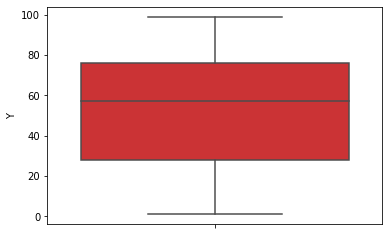

In [40]:
sns.boxplot(y="Y", data=df, palette="Set1")

<AxesSubplot:xlabel='Y', ylabel='X2'>

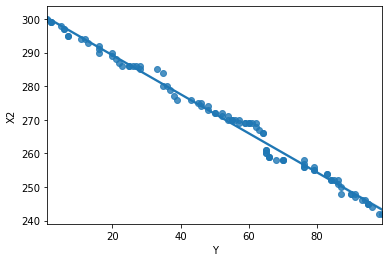

In [23]:
sns.regplot(x=df["Y"], y=df["X2"])

In [24]:
df[['Y','X2']].corr('pearson')

,Y,X2
Y,1.00000,-0.99494
X2,-0.99494,1.00000


<AxesSubplot:xlabel='Y', ylabel='X3'>

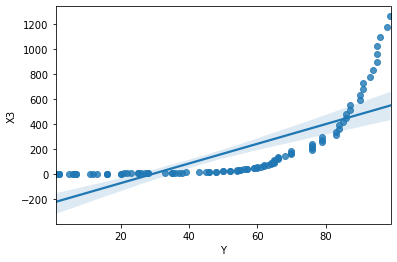

In [25]:
sns.regplot(x=df["Y"], y=df["X3"])

In [26]:
df[['Y','X3']].corr('pearson')

,Y,X3
Y,1.000000,0.747666
X3,0.747666,1.000000


In [27]:
df[['Y','X3']].corr('spearman')

,Y,X3
Y,1.000000,0.999793
X3,0.999793,1.000000


In [92]:
CATVAR = ['X1','X4']
NUMVAR = ['Y']

In [93]:
r2 = pd.DataFrame(columns=['VarQuanti','VarQuali','var*n / n_total','R2'])
for z in NUMVAR:
    for x in CATVAR:
        dfr = df[x].value_counts().reset_index()
        f = 0
        a1 = 0
        for y in range(len(dfr)):
            a = dfr.iloc[y,1]
            a1 = a1 + a
            c = (df[df[x] == dfr.iloc[y,0]])
            e = (c[z].var())*a
            f = f + e
        f = f/a1
        r2_calc = 1 - (f/df[z].var())
        r2 = r2.append({'VarQuanti' : z, 'VarQuali' : x,'var*n / n_total' : f, 'R2' : r2_calc}, ignore_index=True)
r2 = r2.sort_values(by = 'R2', ascending = False)
r2

,VarQuanti,VarQuali,var*n / n_total,R2
0,Y,X1,103.341666,0.871411
1,Y,X4,811.923426,-0.010285


<AxesSubplot:xlabel='X1', ylabel='Y'>

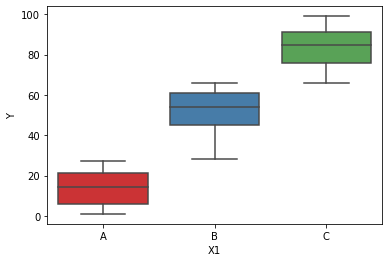

In [29]:
sns.boxplot(x="X1", y="Y", data=df, palette="Set1")

<AxesSubplot:xlabel='X4', ylabel='Y'>

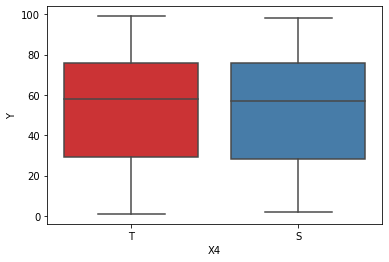

In [30]:
sns.boxplot(x="X4", y="Y", data=df, palette="Set1")

In [65]:
#Variável resposta
df_dep = df[['Y']]
#Variaveis explicativas
df_indep = df[['X1','X2','X3','X4']]

In [66]:
for x in (df_indep.select_dtypes(include=['object']).columns.tolist()):
    one_hot = pd.get_dummies(df_indep[x])
    df_indep = df_indep.drop(x,axis = 1)
    df_indep = df_indep.join(one_hot)

In [67]:
df_indep.head()

,X2,X3,A,B,C,S,T
0,300,1.414214,1,0,0,0,1
1,299,1.515717,1,0,0,1,0
2,299,1.624505,1,0,0,0,1
3,299,1.741101,1,0,0,1,0
4,298,1.866066,1,0,0,0,1


In [68]:
clf = tree.DecisionTreeRegressor(max_depth=3, min_samples_split = 20)
clf = clf.fit(df_indep,df_dep)

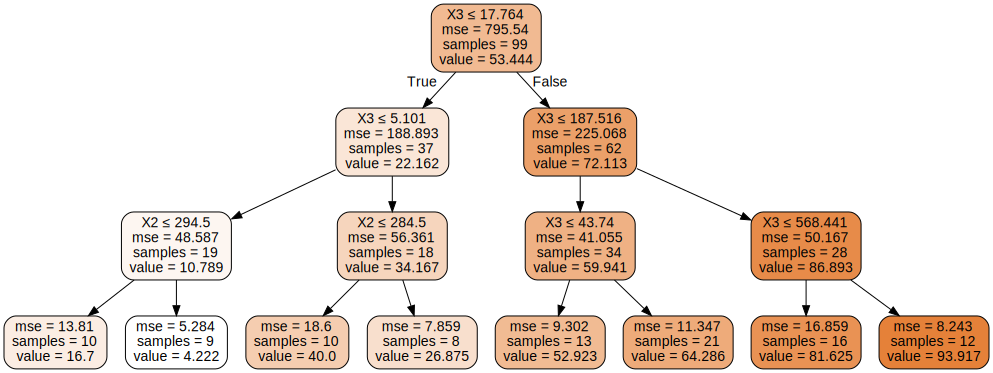

In [69]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=df_indep.columns.values,  
          class_names=df_dep['Y'].unique(),  
          filled=True, rounded=True,  
          special_characters=True, proportion=False)  
graph = graphviz.Source(dot_data)  
graph

In [70]:
df['>60'] = np.where(df['Y'] > 60, 'Acima de 60', '60 ou menos')

In [71]:
df.head()

,Y,X1,X2,X3,X4,>60
0,1,A,300,1.414214,T,60 ou menos
1,2,A,299,1.515717,S,60 ou menos
2,2,A,299,1.624505,T,60 ou menos
3,2,A,299,1.741101,S,60 ou menos
4,5,A,298,1.866066,T,60 ou menos


In [72]:
#Variável resposta
df_dep = df[['>60']]
#Variaveis explicativas
df_indep = df[['X1','X2','X3','X4']]

In [73]:
for x in (df_indep.select_dtypes(include=['object']).columns.tolist()):
    one_hot = pd.get_dummies(df_indep[x])
    df_indep = df_indep.drop(x,axis = 1)
    df_indep = df_indep.join(one_hot)

In [74]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split = 20)
clf = clf.fit(df_indep,df_dep)

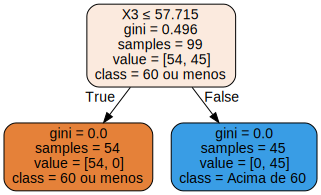

In [76]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
          feature_names=df_indep.columns.values,  
          class_names=df_dep['>60'].unique(),  
          filled=True, rounded=True,  
          special_characters=True, proportion=False)  
graph = graphviz.Source(dot_data)  
graph

In [78]:
print(min(df['Y']))
print(max(df['Y']))

1
99


In [86]:
categorias = [0,20,40,60,99] #limites das classes criadas

In [87]:
df['categorias'] = pd.cut(df['Y'],categorias)

In [88]:
df.head(100)

,Y,X1,X2,X3,X4,>60,categorias
0,1,A,300,1.414214,T,60 ou menos,"(0, 20]"
1,2,A,299,1.515717,S,60 ou menos,"(0, 20]"
2,2,A,299,1.624505,T,60 ou menos,"(0, 20]"
3,2,A,299,1.741101,S,60 ou menos,"(0, 20]"
4,5,A,298,1.866066,T,60 ou menos,"(0, 20]"
...,...,...,...,...,...,...,...
94,95,C,245,955.425783,T,Acima de 60,"(60, 99]"
95,95,C,245,1024.000000,S,Acima de 60,"(60, 99]"
96,96,C,244,1097.496026,T,Acima de 60,"(60, 99]"
97,98,C,242,1176.267116,S,Acima de 60,"(60, 99]"


In [89]:
df['categorias'] = pd.qcut(df['Y'],4) #qcut divide em quantis e, neste caso, em 4

In [90]:
df.head()

,Y,X1,X2,X3,X4,>60,categorias
0,1,A,300,1.414214,T,60 ou menos,"(0.999, 28.0]"
1,2,A,299,1.515717,S,60 ou menos,"(0.999, 28.0]"
2,2,A,299,1.624505,T,60 ou menos,"(0.999, 28.0]"
3,2,A,299,1.741101,S,60 ou menos,"(0.999, 28.0]"
4,5,A,298,1.866066,T,60 ou menos,"(0.999, 28.0]"


In [91]:
df['categorias'].value_counts()

(0.999, 28.0]    26
(57.0, 76.0]     25
(28.0, 57.0]     24
(76.0, 99.0]     24
Name: categorias, dtype: int64